### Scatter Plots

A scatter plot is a two-dimensional plot similar to the line plots I've shown. The scatter function takes an x-axis value as a first argument and y-axis value as the second. If the two arguments are the same, we get a nice diagonal alignment of points.

In [1]:
# Let's bring in the scripting interface
import matplotlib.pyplot as plt

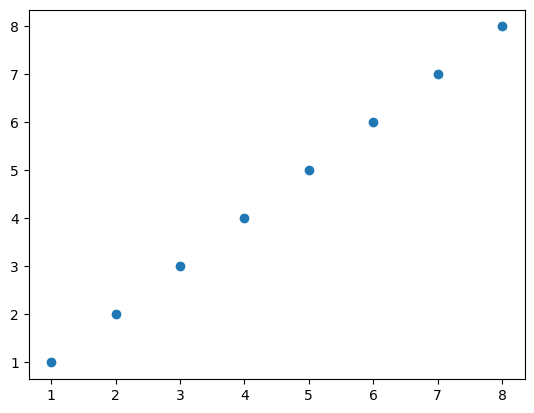

In [2]:
# I'll bring in numpy as we're going to use it later and matplotlib is really based
# on numpy arrays.
import numpy as np

# Now let's create some fake data
x = np.array([1,2,3,4,5,6,7,8])
y = x

# Let's create a new figure
plt.figure()

# And now, let's get matplotlib to produce a scatter plot. This is similar to 
# plt.plot(x,y,'.'), but the underlying child objects in the axes are not Line2d
plt.scatter(x,y)

Now, scatter doesn't represent items as a series as plot did, instead, we can pass it a list of colors which correspond to given points. Let's use some list arithmetic to create a new list just short of the number of data points we need and set all of the values to green. Then we'll add a final value of red.

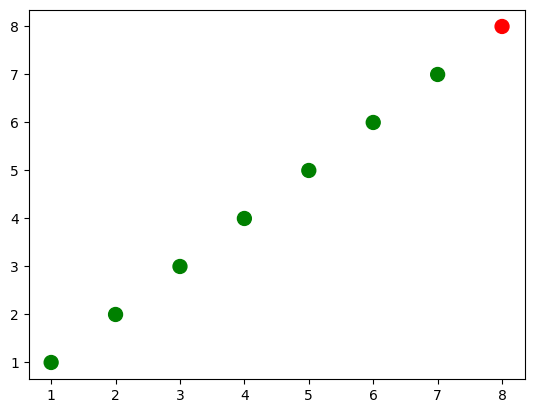

In [6]:
# Some new fake data
x = np.array([1,2,3,4,5,6,7,8])
y = x

# Create a list of colours for each point
colors = (['green']*(len(x)-1))
colors.append('red')

# Create a new figure
plt.figure()

#plot the point with the size 100 and our chosen color list
plt.scatter(x,y,s=100,c=colors)

Memory on the _Zip_ function 

In [7]:
# Convert the two lists into a list of pairwise tuples
zip_generator = zip([1,2,3,4,5], [6,7,8,9,10])

print(list(zip_generator))

# Let's do that again but this time, let's use unpacking instead
zip_generator = zip([1,2,3,4,5], [6,7,8,9,10])
# the single asterisk * unpacks a collection into positional arguments
print(*zip_generator)

[(1, 6), (2, 7), (3, 8), (4, 9), (5, 10)]
(1, 6) (2, 7) (3, 8) (4, 9) (5, 10)


So that's a brief aside on a valuable tool which you will see when manipulating and cleaning data in the wild. Now, let's get back to plotting. Let's take these two lists and plot them to a new figure using scatter. Instead of plotting them as one data series, we'll slice the lists and plot them as two data series.

Instead of setting a color per datapoint, we can color each series with a single value if we want to. We can also do things like change the color or transparency of an entire series. We can also add a descriptive label as well.

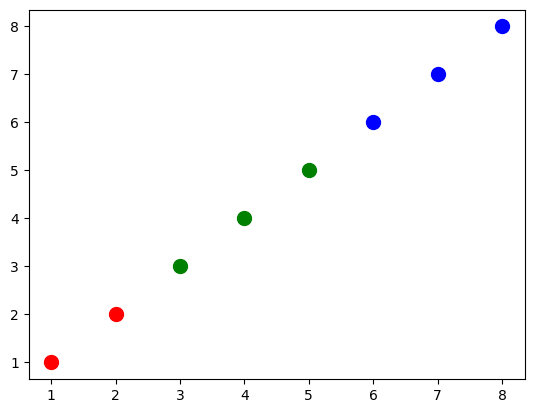

In [9]:
# Create a blank figure
plt.figure()

#plot a data series 'Tall students' in red using the first two elements of x and y
plt.scatter(x[:2],y[:2],s=100,c='red',label='Tall students')
# plot a second data series 'Short students' using blue using the last three elements
# of x and y
plt.scatter(x[-3:],y[-3:],s=100,c='blue',label='Short students')
# plot a third series of 'Average students' in green using the remaining elements
plt.scatter(x[2:-3],y[2:-3],s=100,c='green',label='Average students')

You'll notice that the label didn't show, at the moment it's just held internally for each series, and I'll get to that in a minute, but let's talk a bit more about the properties of axis.

The axes generally have labels to them to explain what they represent or the units that they describe. Charts tend to have titles as well, so let's put this in place and, since pyplot mirros much of the API of the axes objects, we can make calls directly with pyplot.

Text(0.5, 1.0, 'Relationship between ball kicking and grades')

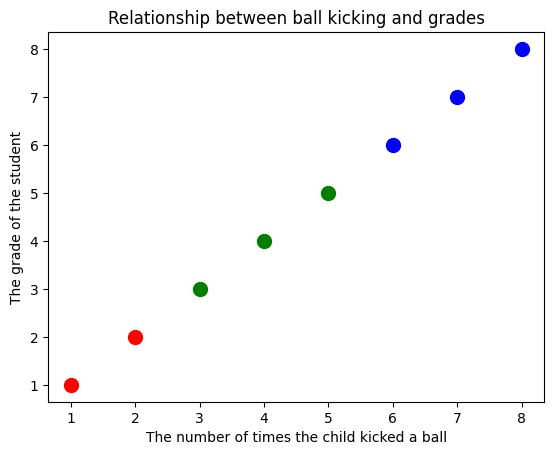

In [10]:
plt.figure()
# let's replot our last plot
#plot a data series 'Tall students' in red using the first two elements of x and y
plt.scatter(x[:2],y[:2],s=100,c='red',label='Tall students')
# plot a second data series 'Short students' using blue using the last three elements
# of x and y
plt.scatter(x[-3:],y[-3:],s=100,c='blue',label='Short students')
# plot a third series of 'Average students' in green using the remaining elements
plt.scatter(x[2:-3],y[2:-3],s=100,c='green',label='Average students')

# add a label to the x-axis
plt.xlabel('The number of times the child kicked a ball')
# add a label to the y-axis
plt.ylabel('The grade of the student')
# add a title
plt.title('Relationship between ball kicking and grades')

And let's add a legend as well. You'll see that matplotlib places this in the upper left hand corner and puts a little visual about our data series there.

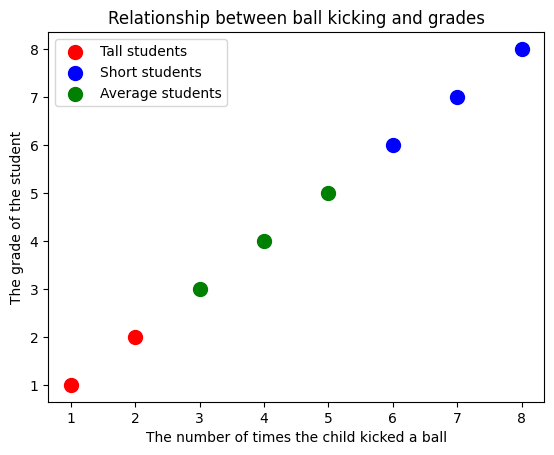

In [11]:
#replotting what we plotted before but adding a legend 
plt.figure()
#plot a data series 'Tall students' in red using the first two elements of x and y
plt.scatter(x[:2],y[:2],s=100,c='red',label='Tall students')
# plot a second data series 'Short students' using blue using the last three elements
# of x and y
plt.scatter(x[-3:],y[-3:],s=100,c='blue',label='Short students')
# plot a third series of 'Average students' in green using the remaining elements
plt.scatter(x[2:-3],y[2:-3],s=100,c='green',label='Average students')

# add a label to the x-axis
plt.xlabel('The number of times the child kicked a ball')
# add a label to the y-axis
plt.ylabel('The grade of the student')
# add a title
plt.title('Relationship between ball kicking and grades')
# add a legend (uses the labels from plt.scatter)
plt.legend()

In the docs for the legend, you'll see that there are a number of different parameters and one of them is called lock. And a value of 4 will put it in the lower right hand corner of the axis.

We could also get rid of the frame and add a title, and do any number of different transformations.

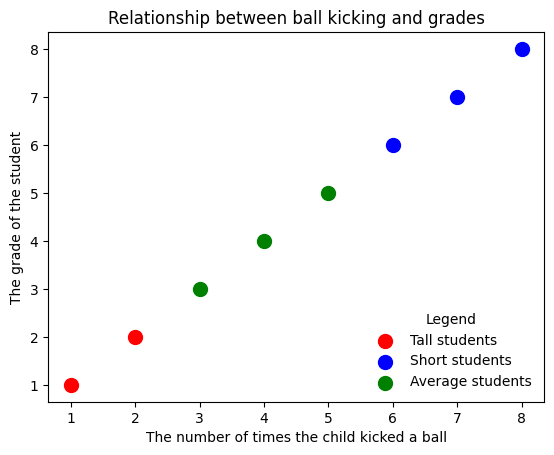

In [13]:
#replotting what we plotted before but adding a legend 
f = plt.figure()
#plot a data series 'Tall students' in red using the first two elements of x and y
plt.scatter(x[:2],y[:2],s=100,c='red',label='Tall students')
# plot a second data series 'Short students' using blue using the last three elements
# of x and y
plt.scatter(x[-3:],y[-3:],s=100,c='blue',label='Short students')
# plot a third series of 'Average students' in green using the remaining elements
plt.scatter(x[2:-3],y[2:-3],s=100,c='green',label='Average students')

# add a label to the x-axis
plt.xlabel('The number of times the child kicked a ball')
# add a label to the y-axis
plt.ylabel('The grade of the student')
# add a title
plt.title('Relationship between ball kicking and grades')
# add a legend (uses the labels from plt.scatter)
plt.legend(loc=4,frameon=False,title='Legend')

Now, all of the things I've been showing you are renderable objects associated with the axes. The legend, for instance, is an artist, which means it can contain children. Let's take advantage of this and write a little routine to recursively go through the list of children in an artist.

In [14]:
# First, we'll import the artist class from matplotlib.
from matplotlib.artist import Artist

# Then we'll make a recursive function which takes in an artist and some depth parameter.
def rec_gc(art, depth=0):
    # Then checks if the object is an artist and if so, prints out its string name.
    if isinstance(art, Artist):
        # increase the depth for pretty printing
        print("  " * depth + str(art))
        for child in art.get_children():
            rec_gc(child, depth+2)

# Call this function on the legend artist to see what the legend is made up of
rec_gc(f.legend())

Legend
            Text(0, 0, '')
                        Text(0, 0, 'Tall students')
                        Text(0, 0, 'Short students')
                        Text(0, 0, 'Average students')
    FancyBboxPatch((0, 0), width=1, height=1)


So you can see the legend artist is just made up of a number of different offsetboxes for drawing, as well as TextAreas and PathCollections.

What I want you to take away from this is that there is nothing magical about what matplotlib is doing. Calls to the scripting interface, just create figures, subplots, and axis. Then load those axis up with various artists, which the back-end renders to the screen or some other medium like a file.